Importing libraries

In [165]:
#data handling
import pandas as pd
import numpy as np
import os 
from PIL import Image

# Machine learning 
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics

#import tensorflow as tf

#import keras
#from keras import layers
#from keras_preprocessing.image import ImageDataGenerator
#from keras.models import Sequential
#from keras.applications.vgg16 import VGG16, preprocess_input
#from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# misc
import time # for recording how long models took to train for later comparison
import multiprocessing # for speeding up training time, needed for some of the larger cross validation methods


Read in csv data from file

In [150]:
img_reshape_size = (32,32)

data = []
result = []

# path to non tumor files
no_tumor_image_dir = "dataset/split_data/binary/no_tumor"
no_tumor_files = os.listdir(no_tumor_image_dir)

# path to tumor files
tumor_image_dir = "dataset/split_data/binary/tumor"
tumor_files = os.listdir(tumor_image_dir)

for file in no_tumor_files:
    temp_file_path = "dataset/split_data/binary/no_tumor/"+file
    #print("path is " +temp_file_path)
    img = Image.open(temp_file_path).convert('L') # not an RGB image so import as greyscale
    img = img.resize(img_reshape_size)
    img = np.array(img)
    img = img.flatten()
    data.append(np.array(img))
    result.append(0)

for file in tumor_files:
    temp_file_path = "dataset/split_data/binary/tumor/"+file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    img = img.flatten()
    data.append(np.array(img))
    result.append(1)

In [151]:
data = np.asarray(data)
print(data.shape)
result=np.asarray(result)
print(result.shape)

(3000, 1024)
(3000,)


In [216]:
param_grid={"C":[0.001,0.01,0.1,1],"gamma":[0.01,0.1,1,10],"kernel":["rbf","sigmoid","poly"]}
#param_grid={"C":[0.001,0.1],"gamma":[0.1],"kernel":["poly"]}

svc=svm.SVC()
cores=multiprocessing.cpu_count()-2
model=GridSearchCV(svc, param_grid, verbose=10, n_jobs=cores, scoring = 'accuracy')

#grid={"penalty":["l1","l2"]}# l1 lasso l2 ridge
#lgc=LogisticRegression( max_iter=10000000)
#logreg_cv=GridSearchCV(lgc,grid,cv=10)
#model=GridSearchCV(logreg_cv,grid, verbose = True)
#lgc.fit(x_train, y_train )
#lgc.score(x_test,y_test)

In [255]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

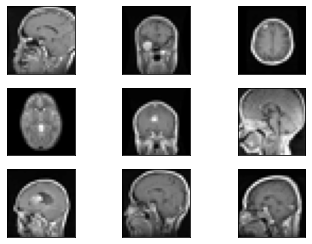

In [218]:
fig = plt.figure()
plt.subplots_adjust(wspace=0, hspace=0)


plt.subplot(3, 3, 1)
image = x_train[0]
im = np.array(image)
im.resize(32,32,1) 
plt.imshow(im, cmap="gray")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

plt.subplot(3, 3, 2)
image = x_train[1]
im = np.array(image)
im.resize(32,32,1) 
plt.imshow(im, cmap="gray")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

plt.subplot(3, 3, 3)
image = x_train[2]
im = np.array(image)
im.resize(32,32,1) 
plt.imshow(im, cmap="gray")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

plt.subplot(3, 3, 4)
image = x_train[3]
im = np.array(image)
im.resize(32,32,1) 
plt.imshow(im, cmap="gray")
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.subplot(3, 3, 5)
image = x_train[4]
im = np.array(image)
im.resize(32,32,1) 
plt.imshow(im, cmap="gray")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

plt.subplot(3, 3, 6)
image = x_train[5]
im = np.array(image)
im.resize(32,32,1) 
plt.imshow(im, cmap="gray")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

plt.subplot(3, 3, 7)
image = x_train[6]
im = np.array(image)
im.resize(32,32,1) 
plt.imshow(im, cmap="gray")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

plt.subplot(3, 3, 8)
image = x_train[7]
im = np.array(image)
im.resize(32,32,1) 
plt.imshow(im, cmap="gray")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

plt.subplot(3, 3, 9)
image = x_train[8]
im = np.array(image)
im.resize(32,32,1) 
plt.imshow(im, cmap="gray")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

plt.subplots_adjust(left=.1,
                    bottom=.1, 
                    right=.9, 
                    top=.9, 
                    wspace=.0005, 
                    hspace=.2)
#plt.show()

plt.savefig('example_training_images.png')

In [219]:
start_time = time.time()
model.fit(x_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
--- 87.14249300956726 seconds ---


In [222]:
model.score(x_test,y_test)
print(model.best_params_)

{'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}


In [223]:
img_reshape_size = (32,32)

test_data = []
test_result = []

# path to non tumor files
no_tumor_image_dir = "test_dataset/test/split_data/binary/no_tumor"
no_tumor_files = os.listdir(no_tumor_image_dir)

# path to tumor files
tumor_image_dir = "test_dataset/test/split_data/binary/tumor"
tumor_files = os.listdir(tumor_image_dir)

for file in no_tumor_files:
    temp_file_path = "test_dataset/test/split_data/binary/no_tumor/"+file
    #print("path is " +temp_file_path)
    img = Image.open(temp_file_path).convert('L') # not an RGB image so import as greyscale
    img = img.resize(img_reshape_size)
    img = np.array(img)
    img = img.flatten()
    test_data.append(np.array(img))
    test_result.append(0)

for file in tumor_files:
    temp_file_path = "test_dataset/test/split_data/binary/tumor/"+file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    img = img.flatten()
    test_data.append(np.array(img))
    test_result.append(1)

In [224]:
print("test data set length : " + str(len(test_data)))
print("test result set length : " + str(len(test_result)))

test data set length : 200
test result set length : 200


In [164]:
model.score(test_data,test_result)

0.945

In [254]:
print(model.predict(test_data[7].reshape(1, -1)))

[0]


In [239]:
for i in range(200):
    print(str(i) + " " + str(test_result[i]))

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 1
125 1
126 1
127 1
128 1
129 1
130 1
131 1
132 1
133 1
134 1
135 1
136 1
137 1
138 1
139 1
140 1
141 1
142 1
143 1
144 1
145 1
146 1
147 1
148 1
149 1
150 1
151 1
152 1
153 1
154 1
155 1
156 1
157 1
158 1
159 1
160 1
161 1
162 1
163 1
164 1
165 1
166 1
167 1
168 1
169 1
170 1
171 1
172 1
173 1
174 1
175 1
176 1
177 1
178 1
179 1
180 1
181 1
182 1
183 1
184 1


RGB images<br>
Fitting 5 folds for each of 48 candidates, totalling 240 fits<br>
--- 749.3267393112183 seconds ---<br> ~12 min

Greyscale image <br>
Fitting 5 folds for each of 48 candidates, totalling 240 fits<br>
--- 229.12096786499023 seconds ---<br> <4min

Text(0.5, 1.0, 'Tumor dataset - probability')

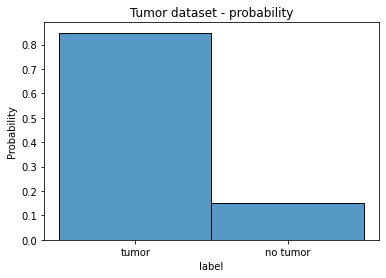

In [10]:
sns.histplot(tumor_labels[tumor_labels.columns[1]], stat="probability").set_title('Tumor dataset - probability')

In [17]:
num_of_classes = 2
input_shape = (512,512,1)
image_dir = "dataset/"
os.listdir(image_dir)

['image', 'label.csv']

In [39]:
train_generator=datagen.flow_from_dataframe(
dataframe=tumor_labels,
directory=image_dir,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

NameError: name 'datagen' is not defined

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_test, y=y_test, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.8s finished


array([0.85833333, 0.875     , 0.875     , 0.86666667, 0.875     ])

In [34]:

train_generator=tf.keras.preprocessing.flow_from_dataframe(dataframe=tumor_labels, directory=image_dir, x_col="id", y_col="label", class_mode="categorical", target_size=(32,32), batch_size=32)

AttributeError: module 'keras.api._v2.keras.preprocessing' has no attribute 'flow_from_dataframe'

In [16]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/split_data/binary/",
    labels="inferred",
    batch_size=32
)

Found 3000 files belonging to 2 classes.


In [26]:
vgg16_weight_path = '../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(
    weights=vgg16_weight_path,
    include_top=False, 
    input_shape=(512,512) + (3,)
)


# basic model for now 
model = keras.Sequential(
    [
        keras.Input(shape=(3000, 512,512)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(2, activation="softmax"),
    ]
)
model.compile()
model.fit()

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.  Received: weights=../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

In [68]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        "dataset/",
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        "dataset/",
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 3000 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.
